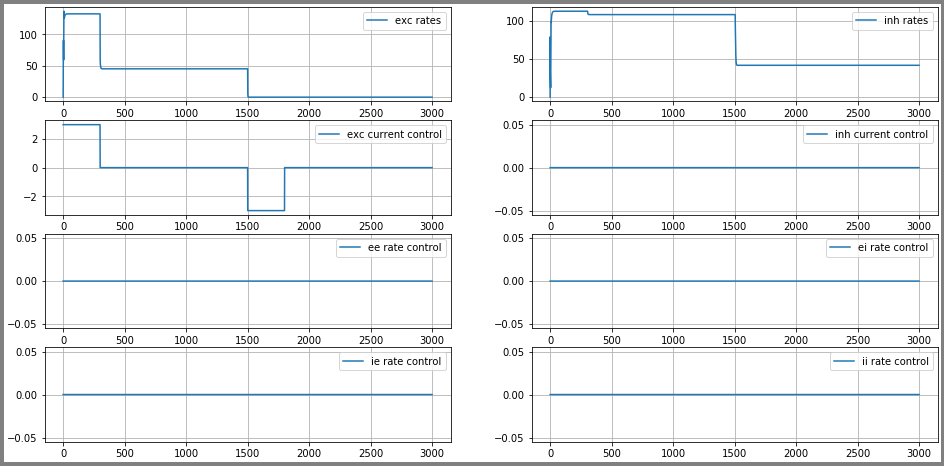

In [1]:
import numpy as np
from neurolib.models.aln import ALNModel
from neurolib.utils import plotFunctions as plotFunc
import neurolib.utils.costFunctions as cost
import neurolib.dashboard.functions as functions
import neurolib.dashboard.data as data
import matplotlib.pyplot as plt
import random

aln = ALNModel()
data.set_parameters(aln)

aln.params.mue_ext_mean = 0.5 * 5. 
aln.params.mui_ext_mean = 0.6 * 5.

aln.params.duration = 3000.
state_vars = aln.state_vars
init_vars = aln.init_vars

def setinit(init_vars_):
    for iv in range(len(init_vars)):
        for sv in range(len(state_vars)):
            if state_vars[sv] in init_vars[iv]:
                #print("set init vars ", )
                if aln.params[init_vars[iv]].ndim == 2:
                    aln.params[init_vars[iv]][0,:] = init_vars_[sv]
                else:
                    aln.params[init_vars[iv]][0] = init_vars_[sv]

control0 = aln.getZeroControl()
control0 = functions.step_control(aln, maxI_ = 3.)
aln.run(control=control0)

target_rates = np.zeros((2))
target_rates[0] = aln.rates_exc[0,-1] 
target_rates[1] = aln.rates_inh[0,-1]

control0 = functions.step_control(aln, maxI_ = -3.)
aln.run(control=control0)
plotFunc.plot_traces(aln,control0)

init_state_vars = np.zeros(( len(state_vars) ))
for j in range(len(state_vars)):
    if aln.state[state_vars[j]].size == 1:
        init_state_vars[j] = aln.state[state_vars[j]][0]
    else:
        init_state_vars[j] = aln.state[state_vars[j]][0,-1]

aln.params.duration = 50
target = aln.getZeroTarget()
target[:,0,:] = target_rates[0]
target[:,1,:] = target_rates[1]

C:\Users\lenas\anaconda3\lib\site-packages\numba\core\ir_utils.py:2031: NumbaPendingDeprecationWarning: 
Encountered the use of a type that is scheduled for deprecation: type 'reflected list' found for argument 'var_' of function 'numba_cost_precision_int'.

For more information visit http://numba.pydata.org/numba-doc/latest/reference/deprecation.html#deprecation-of-reflection-for-list-and-set-types

File "neurolib\utils\costFunctions.py", line 77:
@numba.njit
def numba_cost_precision_int(N, T, dt, i_p, state_, target_state_, var_):
^

  warnings.warn(NumbaPendingDeprecationWarning(msg, loc=loc))


51176.323739023166 0.0 0.0
41485.25126263358 125.0 15.811388300841896
40933.02865139335 62.5 11.180339887498949
35993.89296347688 62.5 15.811388300841896


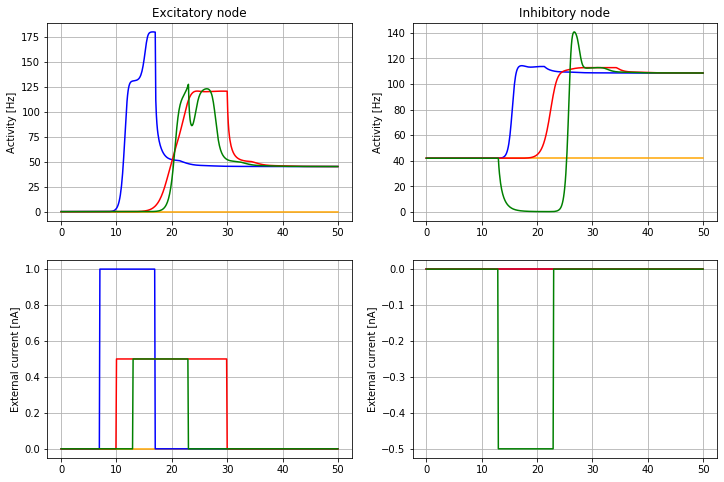

In [2]:
aln.params.duration = 50
setinit(init_state_vars)
T = 1 + aln.params.duration / aln.params.dt
dt = aln.params.dt
time = np.arange(0, aln.params.duration + dt, dt)

control0 = aln.getZeroControl()
aln.run(control=control0)
rates0 = aln.getZeroState()
rates0[0,0,:] = aln.rates_exc[0,:]
rates0[0,1,:] = aln.rates_inh[0,:]
cost_prec0 = cost.cost_precision_int(1, T, dt, 1., rates0, target, va_ = [0])
cost_energy0 = cost.cost_energy_int(1, 2, T, dt, 1., control0)
cost_sparsity0 = cost.f_cost_sparsity_int(1, 2, T, dt, 1., control0)

print(cost_prec0, cost_energy0, cost_sparsity0)

control1 = aln.getZeroControl()
control1[0,0,70:170] = 5.
aln.run(control=control1)
rates1 = aln.getZeroState()
rates1[0,0,:] = aln.rates_exc[0,:]
rates1[0,1,:] = aln.rates_inh[0,:]
cost_prec1 = cost.cost_precision_int(1, T, dt, 1., rates1, target, va_ = [0])
cost_energy1 = cost.cost_energy_int(1, 2, T, dt, 1., control1)
cost_sparsity1 = cost.f_cost_sparsity_int(1, 2, T, dt, 1., control1)

print(cost_prec1, cost_energy1, cost_sparsity1)

control2 = aln.getZeroControl()
control2[0,0,100:300] = 2.5
aln.run(control=control2)
rates2 = aln.getZeroState()
rates2[0,0,:] = aln.rates_exc[0,:]
rates2[0,1,:] = aln.rates_inh[0,:]
cost_prec2 = cost.cost_precision_int(1, T, dt, 1., rates2, target, va_ = [0])
cost_energy2 = cost.cost_energy_int(1, 2, T, dt, 1., control2)
cost_sparsity2 = cost.f_cost_sparsity_int(1, 2, T, dt, 1., control2)

print(cost_prec2, cost_energy2, cost_sparsity2)

control3 = aln.getZeroControl()
control3[0,0,130:230] = 2.5
control3[0,1,130:230] = -2.5
aln.run(control=control3)
rates3 = aln.getZeroState()
rates3[0,0,:] = aln.rates_exc[0,:]
rates3[0,1,:] = aln.rates_inh[0,:]
cost_prec3 = cost.cost_precision_int(1, T, dt, 1., rates3, target, va_ = [0])
cost_energy3 = cost.cost_energy_int(1, 2, T, dt, 1., control3)
cost_sparsity3 = cost.f_cost_sparsity_int(1, 2, T, dt, 1., control3)

print(cost_prec3, cost_energy3, cost_sparsity3)

fig, axs = plt.subplots(2,2, figsize=(12, 8))
axs[0,0].plot(time, rates0[0,0,:], color='orange')
axs[0,1].plot(time, rates0[0,1,:], color='orange')
axs[1,0].plot(time, control0[0,0,:]/5., color='orange')
axs[1,1].plot(time, control0[0,1,:]/5., color='orange')

axs[0,0].plot(time, rates1[0,0,:], color='blue')
axs[0,1].plot(time, rates1[0,1,:], color='blue')
axs[1,0].plot(time, control1[0,0,:]/5., color='blue')
axs[1,1].plot(time, control1[0,1,:]/5., color='blue')

axs[0,0].plot(time, rates2[0,0,:], color='red')
axs[0,1].plot(time, rates2[0,1,:], color='red')
axs[1,0].plot(time, control2[0,0,:]/5., color='red')
axs[1,1].plot(time, control2[0,1,:]/5., color='red')

axs[0,0].plot(time, rates3[0,0,:], color='green')
axs[0,1].plot(time, rates3[0,1,:], color='green')
axs[1,0].plot(time, control3[0,0,:]/5., color='green')
axs[1,1].plot(time, control3[0,1,:]/5., color='green')

axs[0,0].set_title("Excitatory node")
axs[0,1].set_title("Inhibitory node")
axs[0,0].set_ylabel('Activity [Hz]')
axs[1,0].set_ylabel('External current [nA]')
axs[0,1].set_ylabel('Activity [Hz]')
axs[1,1].set_ylabel('External current [nA]')

plt.savefig('control_example.png')

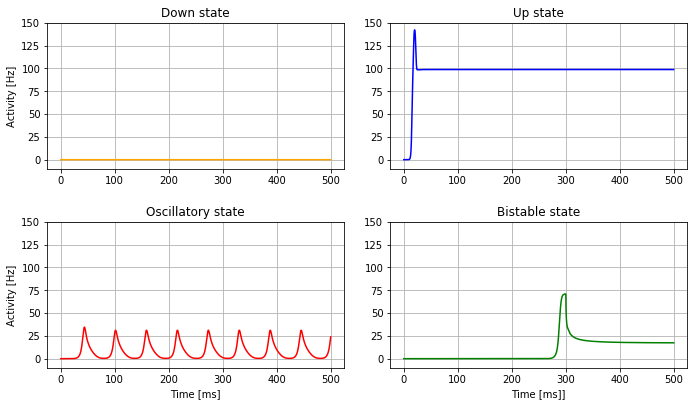

In [3]:
aln.params.duration = 500
setinit(init_state_vars)
control0 = aln.getZeroControl()
time = np.arange(0, aln.params.duration + dt, dt)

aln.params.mue_ext_mean = 0.2 * 5.
aln.params.mui_ext_mean = 0.5 * 5.
aln.run(control=control0)
rates0 = aln.getZeroState()
rates0[0,0,:] = aln.rates_exc[0,:]
rates0[0,1,:] = aln.rates_inh[0,:]

aln.params.mue_ext_mean = 0.8 * 5.
aln.params.mui_ext_mean = 0.2 * 5.
aln.run(control=control0)
rates1 = aln.getZeroState()
rates1[0,0,:] = aln.rates_exc[0,:]
rates1[0,1,:] = aln.rates_inh[0,:]

aln.params.mue_ext_mean = 0.3 * 5.
aln.params.mui_ext_mean = 0.2 * 5.
aln.run(control=control0)
rates2 = aln.getZeroState()
rates2[0,0,:] = aln.rates_exc[0,:]
rates2[0,1,:] = aln.rates_inh[0,:]

aln.params.mue_ext_mean = 0.4 * 5.
aln.params.mui_ext_mean = 0.5 * 5.
aln.run(control=functions.step_control(aln, maxI_ = 1.2))
rates3 = aln.getZeroState()
rates3[0,0,:] = aln.rates_exc[0,:]
rates3[0,1,:] = aln.rates_inh[0,:]

fig, ax = plt.subplots(2,2, figsize=(10, 6))
ax[0,0].plot(time, rates0[0,0,:], color='orange')
ax[0,1].plot(time, rates1[0,0,:], color='blue')
ax[1,0].plot(time, rates2[0,0,:], color='red')
ax[1,1].plot(time, rates3[0,0,:], color='green')

ax[0,0].set_title("Down state")
ax[0,1].set_title("Up state")
ax[1,0].set_title("Oscillatory state")
ax[1,1].set_title("Bistable state")
ax[0,0].set_ylim([-10,150])
ax[0,1].set_ylim([-10,150])
ax[1,0].set_ylim([-10,150])
ax[1,1].set_ylim([-10,150])
ax[0,0].set_ylabel('Activity [Hz]')
ax[1,0].set_ylabel('Activity [Hz]')
#ax[0,1].set_ylabel('Activity [Hz]')
#ax[1,1].set_ylabel('Activity [Hz]')
#ax[0,0].set_xlabel('Time [ms]')
ax[1,0].set_xlabel('Time [ms]')
#ax[0,1].set_xlabel('Time [ms]')
ax[1,1].set_xlabel('Time [ms]]')

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=0.2)
fig.tight_layout(pad=2.0)

plt.savefig('regimes.png')
plt.show()

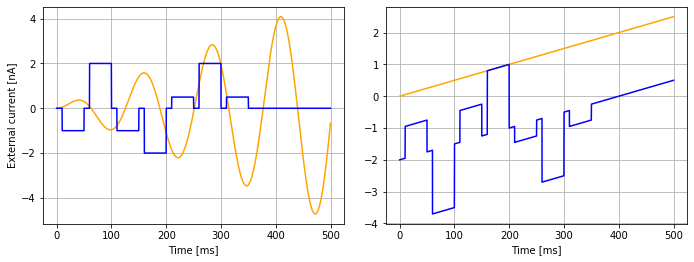

In [4]:
aln.params.duration = 500
setinit(init_state_vars)
control0 = aln.getZeroControl()
control1 = aln.getZeroControl()
time = np.arange(0, aln.params.duration + dt, dt)
data.set_parameters(aln)

control0[0,0,:] = 0.01 * time * np.sin(time/20)
control0[0,1,:] = 0.005 * time
control1[0,0,100:500] = -1.
control1[0,0,600:1000] = 2.
control1[0,0,1100:1500] = -1.
control1[0,0,1600:2000] = -2.
control1[0,0,2100:2500] = 0.5
control1[0,0,2600:3000] = 2.
control1[0,0,3100:3500] = 0.5
control1[0,1,:] = -2. + 0.005 * time - control1[0,0,:]

fig, ax = plt.subplots(1,2, figsize=(10, 4))
ax[0].plot(time, control0[0,0,:], color='orange')
ax[1].plot(time, control0[0,1,:], color='orange')
ax[0].plot(time, control1[0,0,:], color='blue')
ax[1].plot(time, control1[0,1,:], color='blue')

ax[0].set_ylabel('External current [nA]')
ax[0].set_xlabel('Time [ms]')
ax[1].set_xlabel('Time [ms]')

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=0.2)
fig.tight_layout(pad=2.0)

plt.savefig('control_guess.png')
plt.show()

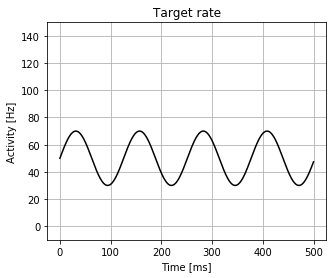

In [5]:
fig, ax = plt.subplots(1,1, figsize=(5, 4))
ax.plot(time, 20. * np.sin(time/20) + 50., color='black')

ax.set_ylabel('Activity [Hz]')
ax.set_xlabel('Time [ms]')
ax.set_ylim([-10., 150.])
ax.set_title("Target rate")

plt.savefig('target.png')
plt.show()

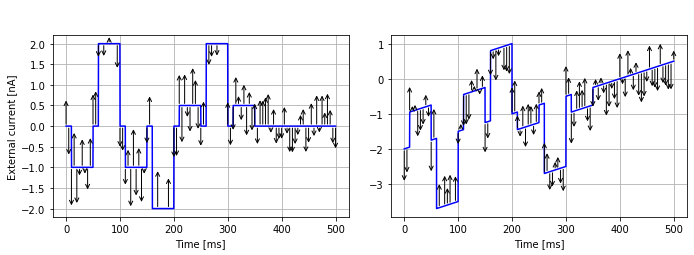

In [13]:
fig, ax = plt.subplots(1,2, figsize=(10, 4))
ax[0].plot(time, control1[0,0,:], color='blue')
ax[1].plot(time, control1[0,1,:], color='blue')

ax[0].set_ylabel('External current [nA]')
ax[0].set_xlabel('Time [ms]')
ax[1].set_xlabel('Time [ms]')

for t in np.arange(0, aln.params.duration+1, 5):
    y0 = control1[0,0,t*10]
    dy0 = 0.
    while np.abs(dy0) < 0.2:
        dy0 = 2. * random.random() - 1.
    dy1 = 0.
    while np.abs(dy1) < 0.2:
        dy1 = 2. * random.random() - 1.
    y1 = control1[0,1,t*10]
    ax[0].annotate("", xy=(t, y0 + dy0), xytext=(t, y0), arrowprops=dict(arrowstyle="->"))
    ax[1].annotate("", xy=(t, y1 + dy1), xytext=(t, y1), arrowprops=dict(arrowstyle="->"))

fig.tight_layout(pad=2.0)

plt.savefig('control_gradient.png')
plt.show()